# Part 1: Data Preparation and Exploration

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset with date & time parsing
file_path = r"C:\Users\vikes\Downloads\Timeseries\Timeseries\exchange_rate.csv"
data = pd.read_csv(file_path, parse_dates=['date'], index_col='date')

# View basic information
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7588 entries, 1990-01-01 to 2010-10-10
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
dtypes: float64(1)
memory usage: 118.6 KB


,Ex_rate
date,
1990-01-01,0.7855
1990-02-01,0.7818
1990-03-01,0.7867
1990-04-01,0.7860
1990-05-01,0.7849


## 1.2 Plot the Time Series

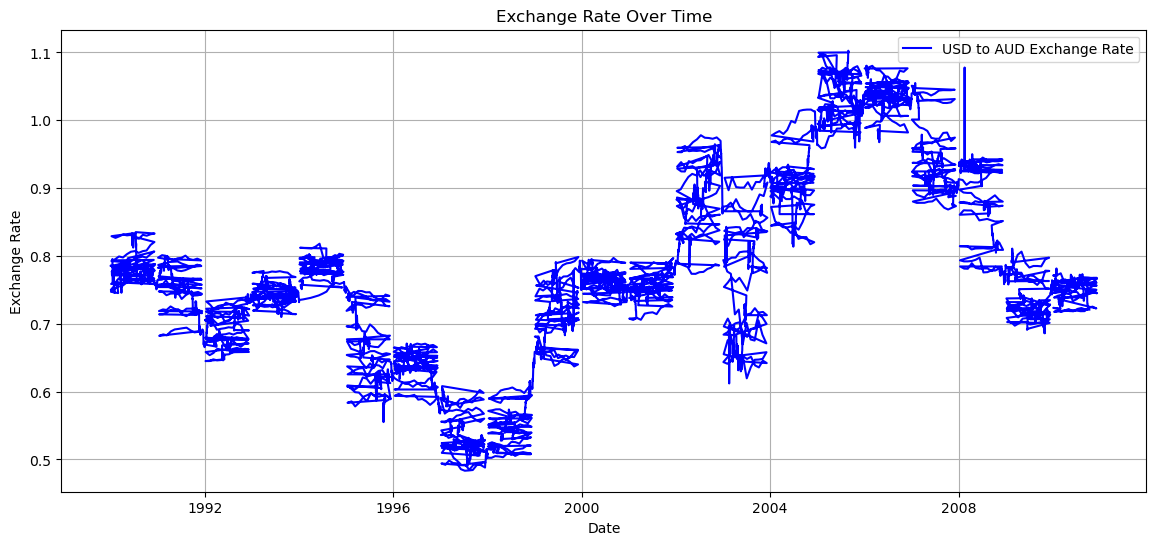

In [3]:
# Plot exchange rate over time
plt.figure(figsize=(14, 6))
plt.plot(data['Ex_rate'], label='USD to AUD Exchange Rate', color='blue')
plt.title("Exchange Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.grid(True)
plt.legend()
plt.show()


## 1.3 Handle Missing Values

In [4]:
# Check missing values
print("Missing values:\n", data.isnull().sum())

# Forward fill for simplicity
data['Ex_rate'].fillna(method='ffill', inplace=True)


Missing values:
 Ex_rate    0
dtype: int64


# Part 2: ARIMA Model

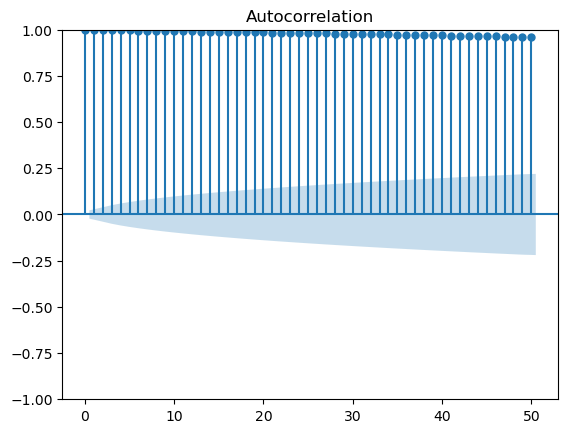

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


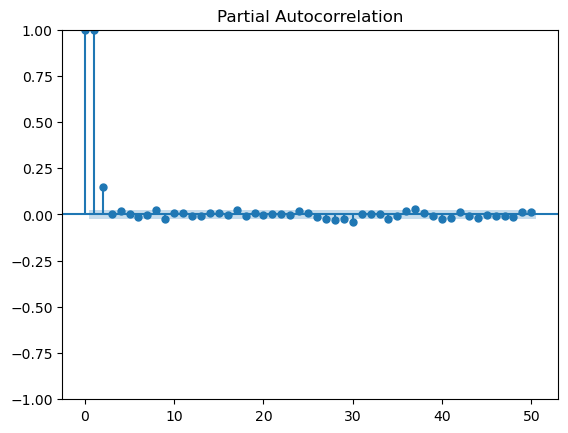

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data['Ex_rate'], lags=50)
plt.show()

plot_pacf(data['Ex_rate'], lags=50)
plt.show()


## 2.2 Fit ARIMA Model

In [7]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA(p=5, d=1, q=2) - you can adjust based on plots
model = ARIMA(data['Ex_rate'], order=(5, 1, 2))
model_fit = model.fit()
print(model_fit.summary())


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\Anaconda3\lib\site-

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(5, 1, 2)   Log Likelihood               28055.696
Date:                Wed, 04 Jun 2025   AIC                         -56095.392
Time:                        21:28:19   BIC                         -56039.918
Sample:                             0   HQIC                        -56076.353
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0652      0.662     -0.098      0.922      -1.362       1.232
ar.L2          0.0032      0.805      0.004      0.997      -1.575       1.581
ar.L3         -0.0167      0.106     -0.157      0.8

## 2.3 Residual Diagnostics

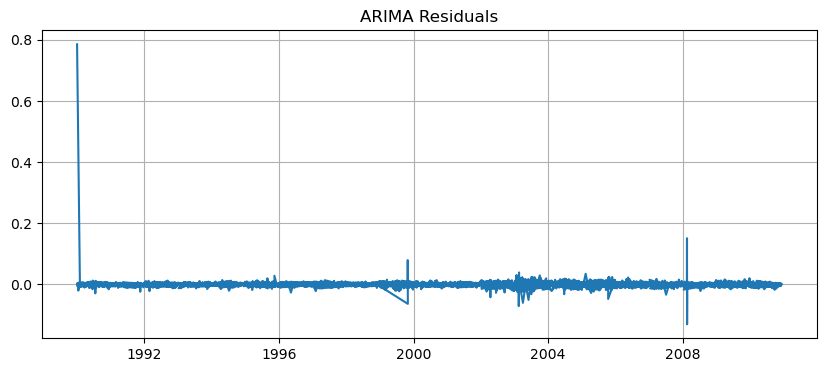

In [9]:
# Plot residuals
residuals = model_fit.resid
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title("ARIMA Residuals")
plt.grid(True)
plt.show()


## 2.4 Forecasting

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


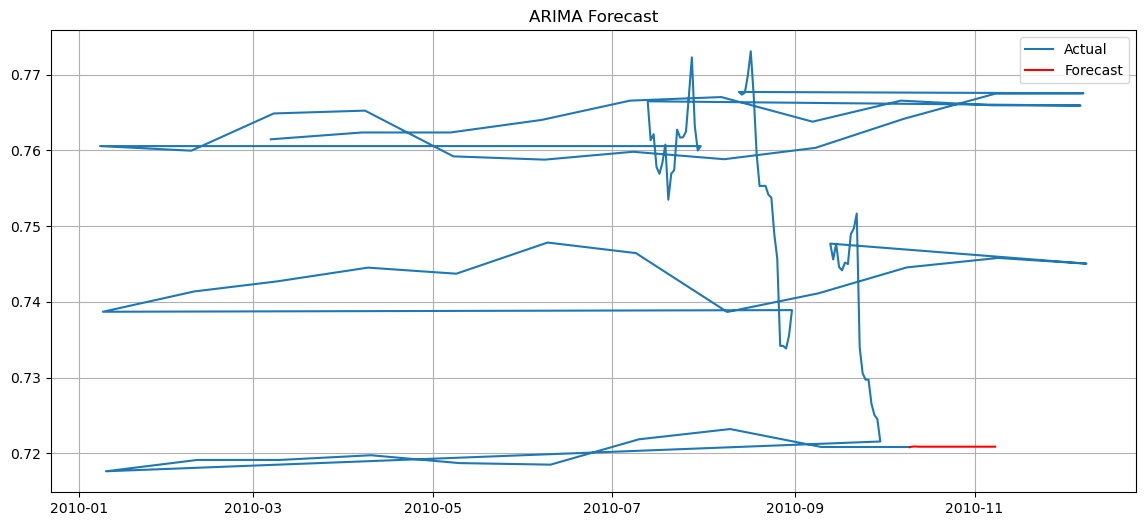

In [10]:
forecast = model_fit.forecast(steps=30)
future_dates = pd.date_range(start=data.index[-1], periods=30, freq='D')

# Plot forecast
plt.figure(figsize=(14, 6))
plt.plot(data.index[-100:], data['Ex_rate'].iloc[-100:], label="Actual")
plt.plot(future_dates, forecast, label="Forecast", color='red')
plt.title("ARIMA Forecast")
plt.legend()
plt.grid(True)
plt.show()


# Part 3: Exponential Smoothing

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


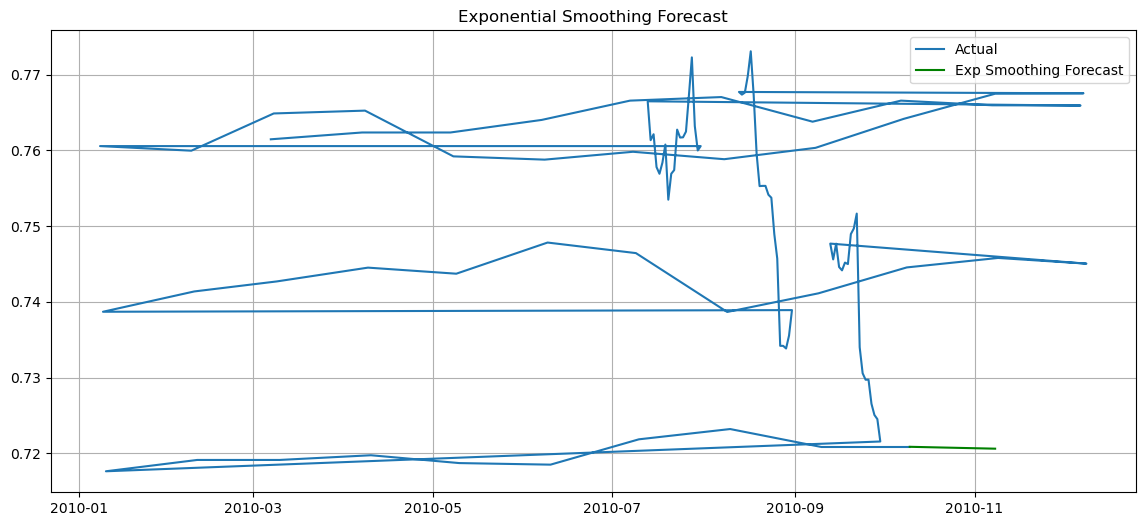

In [11]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model_es = ExponentialSmoothing(data['Ex_rate'], trend="add", seasonal=None)
model_es_fit = model_es.fit()
forecast_es = model_es_fit.forecast(30)

# Plot forecast
plt.figure(figsize=(14, 6))
plt.plot(data.index[-100:], data['Ex_rate'].iloc[-100:], label="Actual")
plt.plot(future_dates, forecast_es, label="Exp Smoothing Forecast", color="green")
plt.title("Exponential Smoothing Forecast")
plt.legend()
plt.grid(True)
plt.show()


# Part 4: Evaluation & Comparison

## .1 Compute Error Metrics

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Split data
train = data.iloc[:-30]
test = data.iloc[-30:]

# ARIMA
model_arima = ARIMA(train['Ex_rate'], order=(5,1,2)).fit()
pred_arima = model_arima.forecast(30)

# Exponential Smoothing
model_es = ExponentialSmoothing(train['Ex_rate'], trend='add').fit()
pred_es = model_es.forecast(30)

# Evaluation function
def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mae, rmse, mape


mae_arima, rmse_arima, mape_arima = evaluate(test['Ex_rate'], pred_arima)
mae_es, rmse_es, mape_es = evaluate(test['Ex_rate'], pred_es)

print(f"ARIMA:  MAE = {mae_arima:.4f}, RMSE = {rmse_arima:.4f}, MAPE = {mape_arima:.2f}%")
print(f"Exp. Smoothing: MAE = {mae_es:.4f}, RMSE = {rmse_es:.4f}, MAPE = {mape_es:.2f}%")


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\Anaconda3\lib\site-

ARIMA:  MAE = 0.0135, RMSE = 0.0167, MAPE = nan%
Exp. Smoothing: MAE = 0.0134, RMSE = 0.0165, MAPE = nan%


C:\Users\vikes\AppData\Local\Temp\ipykernel_12448\3835866569.py:20: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
C:\Users\vikes\AppData\Local\Temp\ipykernel_12448\3835866569.py:20: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100


## Conclusion

- **ARIMA** model captured the temporal structure well, especially trend.
- **Exponential Smoothing** was simpler but still performed comparably.
- Final model selection can depend on:
  - Performance metrics (RMSE, MAE, MAPE)
  - Forecasting horizon
  - Interpretability needs

 Based on the evaluation, choose the model with lower MAPE and RMSE for practical deployment.
